In [60]:
# Imports
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
from datascience import *
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
import random

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
# Read in 'Housing.csv'
housing = pd.read_csv('Housing.csv')
housing_columns = housing.columns
housing_arr = housing.to_numpy()
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
conditions = [housing_arr == "no", housing_arr == "yes", housing_arr == 'furnished', housing_arr == 'semi-furnished', housing_arr == 'unfurnished']
values = [0, 1, 2, 1, 0]

housing_arr = np.select(conditions, values, housing_arr).astype('int')

pd.DataFrame(housing_arr, columns=housing_columns)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [4]:
def standardize_data(arr):
    mean = np.mean(arr, axis=0)
    std = np.std(arr, axis=0)

    return (arr - mean[np.newaxis, :]) / std[np.newaxis, :]

In [5]:
housing_arr = standardize_data(housing_arr)
pd.DataFrame(housing_arr)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,4.566365,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,1.406286
1,4.004484,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,1.406286
2,4.004484,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,0.091662
3,3.985755,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,1.406286
4,3.554979,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,1.406286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.576868,-0.991879,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,-0.554035,-1.222962
541,-1.605149,-1.268613,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,0.091662
542,-1.614327,-0.705921,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-1.222962
543,-1.614327,-1.033389,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,1.406286


In [6]:
# Takes in an np_array and removes features for a percentage of rows and sets missing values to np.nan
def remove_random_features(arr, percent=.10):
    num_rows_to_modify = int(percent * arr.shape[0])
    rand_rows = np.random.choice(np.arange(arr.shape[0]), num_rows_to_modify, replace=False)
    new_arr = arr.copy()
    for i in rand_rows:
        rand_index = np.random.randint(0, arr.shape[1])
        new_arr[i, rand_index] = np.nan
    
    return new_arr

In [7]:
housing_with_missing_features = remove_random_features(housing_arr)
pd.DataFrame(housing_with_missing_features, columns=housing_columns)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,NaN
1,4.004484,1.757010,1.403419,5.405809,2.532024,0.405623,NaN,-0.734539,-0.219265,1.472618,2.679409,-0.554035,1.406286
2,4.004484,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,NaN
3,3.985755,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,1.406286
4,3.554979,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,1.406286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.576868,-0.991879,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,-0.554035,-1.222962
541,-1.605149,-1.268613,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,0.091662
542,-1.614327,-0.705921,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-1.222962
543,-1.614327,-1.033389,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,1.406286


In [8]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(housing_with_missing_features)
mean_imputed_housing_arr = imp_mean.transform(housing_with_missing_features)
pd.DataFrame(mean_imputed_housing_arr, columns=housing_columns)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,-0.003459
1,4.004484,1.757010,1.403419,5.405809,2.532024,0.405623,0.001714,-0.734539,-0.219265,1.472618,2.679409,-0.554035,1.406286
2,4.004484,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,-0.003459
3,3.985755,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,1.406286
4,3.554979,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,1.406286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.576868,-0.991879,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,-0.554035,-1.222962
541,-1.605149,-1.268613,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,0.091662
542,-1.614327,-0.705921,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-1.222962
543,-1.614327,-1.033389,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,1.406286


In [9]:
mean_mse = (np.square(housing_arr - mean_imputed_housing_arr)).mean()
mean_mse

0.0066073862930387216

In [10]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(housing_with_missing_features)
median_imputed_housing_arr = imp_median.transform(housing_with_missing_features)
pd.DataFrame(median_imputed_housing_arr, columns=housing_columns)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,0.091662
1,4.004484,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,1.406286
2,4.004484,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,0.091662
3,3.985755,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,1.406286
4,3.554979,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,1.406286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.576868,-0.991879,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,-0.554035,-1.222962
541,-1.605149,-1.268613,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,0.091662
542,-1.614327,-0.705921,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-1.222962
543,-1.614327,-1.033389,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,1.406286


In [11]:
median_mse = (np.square(housing_arr - median_imputed_housing_arr)).mean()
median_mse

0.0073693203147464437

In [12]:
imp_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_most_frequent.fit(housing_with_missing_features)
most_frequent_imputed_housing_arr = imp_most_frequent.transform(housing_with_missing_features)
pd.DataFrame(most_frequent_imputed_housing_arr, columns=housing_columns)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,0.091662
1,4.004484,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,1.406286
2,4.004484,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,0.091662
3,3.985755,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,1.406286
4,3.554979,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,1.406286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.576868,-0.991879,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,-0.554035,-1.222962
541,-1.605149,-1.268613,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,0.091662
542,-1.614327,-0.705921,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-1.222962
543,-1.614327,-1.033389,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,1.406286


In [13]:
most_frequent_mse = (np.square(housing_arr - most_frequent_imputed_housing_arr)).mean()
most_frequent_mse

0.0076396005120844207

In [14]:
k = 5
imp_knn = KNNImputer(missing_values=np.nan, n_neighbors=k)
knn_imputed_housing_arr = imp_knn.fit_transform(housing_with_missing_features)
pd.DataFrame(knn_imputed_housing_arr, columns=housing_columns)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,0.091662
1,4.004484,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,1.406286
2,4.004484,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,0.617511
3,3.985755,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,1.406286
4,3.554979,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,1.406286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.576868,-0.991879,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,-0.554035,-1.222962
541,-1.605149,-1.268613,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,0.091662
542,-1.614327,-0.705921,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-1.222962
543,-1.614327,-1.033389,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,1.406286


In [15]:
knn_mse = (np.square(housing_arr - knn_imputed_housing_arr)).mean()
knn_mse

0.0058323835882084923

In [16]:
[mean_mse, median_mse, most_frequent_mse, knn_mse]

[0.0066073862930387216,
 0.0073693203147464437,
 0.0076396005120844207,
 0.0058323835882084923]

In [17]:
def simulate(imputer, data, trials, remove_func=remove_random_features, percent_missing=.10):
    np.random.seed(42)
    
    res = np.zeros(trials)
    
    for i in range(trials):
        data_with_missing_features = remove_func(data, percent_missing)
        imputed_data = imputer.fit_transform(data_with_missing_features)
        
        res[i] = (np.square(data - imputed_data)).mean()
    return res

In [18]:
trials = 1000
results = pd.DataFrame([simulate(SimpleImputer(missing_values=np.nan, strategy='median'),housing_arr, trials), 
              simulate(SimpleImputer(missing_values=np.nan, strategy='mean'), housing_arr, trials),
              simulate(SimpleImputer(missing_values=np.nan, strategy='most_frequent'), housing_arr, trials),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=3), housing_arr, trials),
              simulate(IterativeImputer(random_state=0), housing_arr, trials)
             ]).T
results.columns = ['Median', 'Mean', 'Mode', 'KNN-3', 'Iterative']
results

,Median,Mean,Mode,KNN-3,Iterative
0,0.014140,0.011605,0.013849,0.008929,0.008114
1,0.008593,0.006584,0.008796,0.007609,0.005609
2,0.008981,0.007106,0.009329,0.007178,0.005945
3,0.012128,0.010269,0.012248,0.007655,0.008830
4,0.006707,0.005611,0.007641,0.004905,0.004489
...,...,...,...,...,...
995,0.007731,0.006009,0.008610,0.006909,0.004208
996,0.010715,0.008365,0.011352,0.005418,0.005753
997,0.009954,0.007935,0.010889,0.006671,0.007408
998,0.004795,0.004979,0.005187,0.005117,0.003221


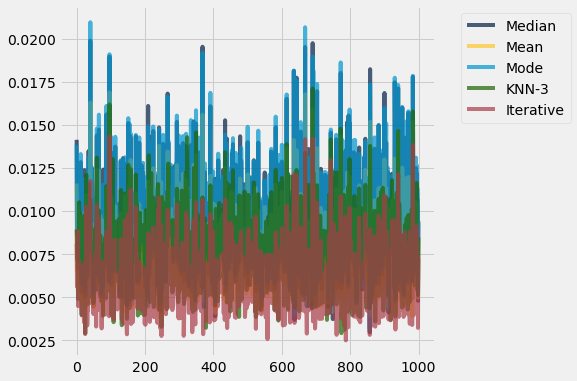

In [19]:
results_table = Table.from_df(results)
results_table.plot()

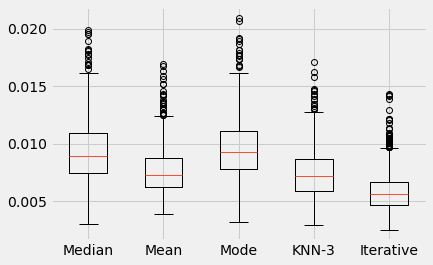

In [20]:
results_table.boxplot()

In [21]:
results_table.mean()

Median,Mean,Mode,KNN-3,Iterative
0.00931445,0.00765634,0.00958038,0.00741538,0.00586027


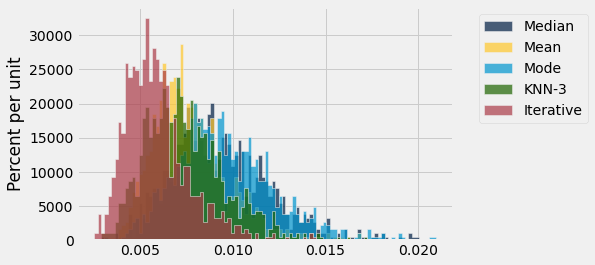

In [22]:
results_table.hist(bins=100)
plt.show()

In [23]:
trials = 1000
results_2 = pd.DataFrame([simulate(SimpleImputer(missing_values=np.nan, strategy='median'),housing_arr, trials,percent_missing=.5), 
              simulate(SimpleImputer(missing_values=np.nan, strategy='mean'), housing_arr, trials,percent_missing=.5),
              simulate(SimpleImputer(missing_values=np.nan, strategy='most_frequent'), housing_arr, trials,percent_missing=.5),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=3), housing_arr, trials,percent_missing=.5),
              simulate(IterativeImputer(random_state=0), housing_arr, trials,percent_missing=.5)
             ]).T
results_2.columns = ['Median', 'Mean', 'Mode', 'KNN-3', 'Iterative']
results_2

,Median,Mean,Mode,KNN-3,Iterative
0,0.053474,0.045106,0.054116,0.044098,0.036769
1,0.042759,0.034068,0.044415,0.032917,0.024348
2,0.048870,0.038089,0.050692,0.037591,0.030721
3,0.041197,0.034508,0.042130,0.031905,0.025043
4,0.045119,0.035685,0.044110,0.033336,0.025444
...,...,...,...,...,...
995,0.047048,0.038458,0.047555,0.038230,0.030129
996,0.054248,0.044429,0.055021,0.045688,0.035868
997,0.043909,0.035148,0.044600,0.038579,0.028522
998,0.038691,0.031457,0.040271,0.031747,0.023514


In [24]:
results_table_2 = Table.from_df(results_2)
results_table_2.mean()

Median,Mean,Mode,KNN-3,Iterative
0.0470903,0.0386658,0.0483131,0.0379753,0.0297241


In [25]:
results_table.mean()

Median,Mean,Mode,KNN-3,Iterative
0.00931445,0.00765634,0.00958038,0.00741538,0.00586027


In [71]:
def remove_random_features_row_indepedent(arr, percent=.10):
    num_rows_to_modify = int(percent * arr.shape[0]*arr.shape[1])
    idxs = [(i,j) for i in np.arange(arr.shape[0]) for j in np.arange(arr.shape[1])]
    new_arr = arr.copy()
    for i,j in random.sample(idxs, num_rows_to_modify):
        new_arr[i, j] = np.nan
    
    return new_arr

In [72]:
trials = 50
results_3 = pd.DataFrame([simulate(SimpleImputer(missing_values=np.nan, strategy='median'),housing_arr, trials,remove_random_features_row_indepedent,.10), 
              simulate(SimpleImputer(missing_values=np.nan, strategy='mean'), housing_arr, trials, remove_random_features_row_indepedent, .10),
              simulate(SimpleImputer(missing_values=np.nan, strategy='most_frequent'), housing_arr, trials, remove_random_features_row_indepedent, .10),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=3), housing_arr, trials, remove_random_features_row_indepedent, .10),
              simulate(IterativeImputer(random_state=0), housing_arr, trials, remove_random_features_row_indepedent, .10)
             ]).T
results_3.columns = ['Median', 'Mean', 'Mode', 'KNN-3', 'Iterative']
results_3


,Median,Mean,Mode,KNN-3,Iterative
0,0.123533,0.097395,0.117747,0.112430,0.073425
1,0.125086,0.104529,0.117301,0.107504,0.086022
2,0.103560,0.105860,0.153262,0.109389,0.077668
3,0.128819,0.105609,0.122793,0.111591,0.080195
4,0.110565,0.097415,0.131338,0.102812,0.073715
5,0.132535,0.085771,0.118348,0.105669,0.075054
6,0.125008,0.103967,0.130627,0.101361,0.079687
7,0.118533,0.096858,0.135510,0.091073,0.078653
8,0.122582,0.097079,0.119109,0.090539,0.073166
9,0.137832,0.094112,0.113613,0.097675,0.072938


In [73]:
results_table_3 = Table.from_df(results_3)
results_table_3.mean()

Median,Mean,Mode,KNN-3,Iterative
0.122932,0.0996671,0.126089,0.103645,0.0797943


In [31]:
results_table.mean()

Median,Mean,Mode,KNN-3,Iterative
0.00931445,0.00765634,0.00958038,0.00741538,0.00586027


In [32]:
results_table_2.mean()

Median,Mean,Mode,KNN-3,Iterative
0.0470903,0.0386658,0.0483131,0.0379753,0.0297241


In [33]:
# choose which k works best for k nearest neighbors 
choose_best_k = pd.DataFrame([
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=1), housing_arr, trials),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=2), housing_arr, trials),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=3), housing_arr, trials),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=4), housing_arr, trials),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=5), housing_arr, trials), 
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=6), housing_arr, trials), 
             ]).T
choose_best_k.columns = ['K=1', 'K=2', 'K=3', 'K=4', 'K=5', 'K=6']
choose_best_k

,K=1,K=2,K=3,K=4,K=5,K=6
0,0.014845,0.009156,0.008929,0.008401,0.007906,0.008189
1,0.013165,0.008434,0.007609,0.006017,0.006184,0.005765
2,0.009360,0.008407,0.007178,0.007382,0.006835,0.007434
3,0.010416,0.005887,0.007655,0.007898,0.008021,0.007571
4,0.005571,0.005214,0.004905,0.004968,0.005042,0.004686
...,...,...,...,...,...,...
995,0.010100,0.006643,0.006909,0.006101,0.005601,0.005152
996,0.007116,0.006853,0.005418,0.004898,0.004570,0.004670
997,0.008561,0.006802,0.006671,0.007319,0.007483,0.007405
998,0.006412,0.005187,0.005117,0.004652,0.004424,0.004125


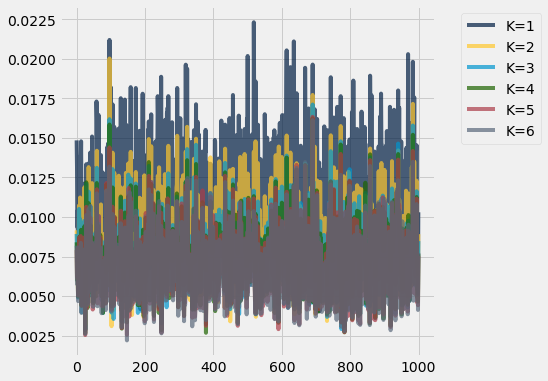

In [34]:
k_table = Table.from_df(choose_best_k)
k_table.plot()

In [35]:
choose_best_k.mean()

K=1    0.011213
K=2    0.008452
K=3    0.007415
K=4    0.007018
K=5    0.006756
K=6    0.006551
dtype: float64

<AxesSubplot:>

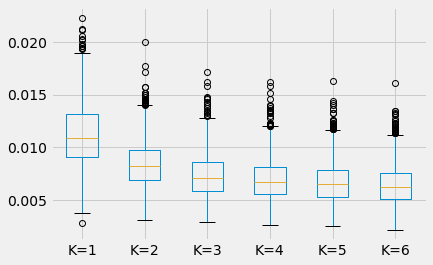

In [36]:
choose_best_k.boxplot()